In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ROOT
import time

Welcome to JupyROOT 6.22/02


In [2]:
root_file = ROOT.TFile("../../ML-Data/LAOD/True_Merged_Pi0.root", "OPEN")
tree_pi0 = root_file.Get("True_Merged_Calo_Cluster_Pi0")

In [3]:
#Get number of entries from tree
nentries = tree_pi0.GetEntries()

#Set up reading out of a 2d-array from tree
tclus = np.zeros((50,50), dtype=np.float32) #serves as buffer for each array
cluster = np.zeros((nentries,50,50), dtype=np.float32)
tree_pi0.SetBranchAddress("Cluster", tclus) #connects branch with buffer

4

In [11]:
for i in range(nentries):
    tree_pi0.GetEntry(i)
    cluster[i,:,:] = tclus

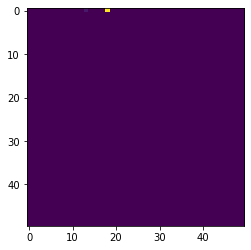

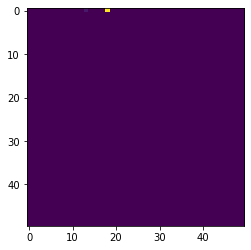

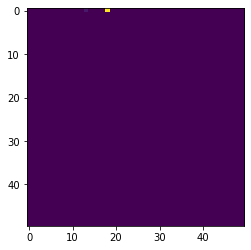

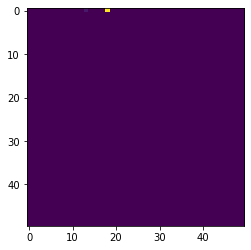

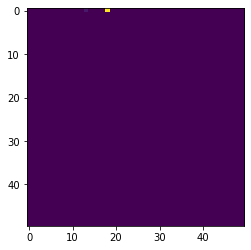

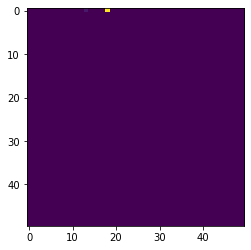

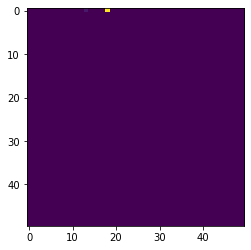

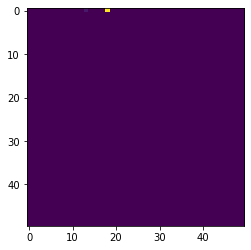

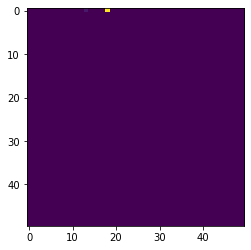

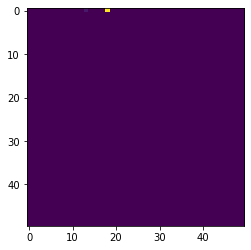

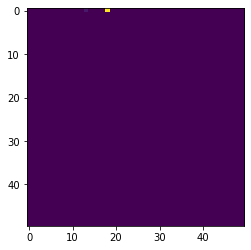

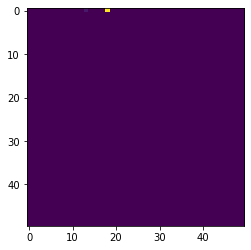

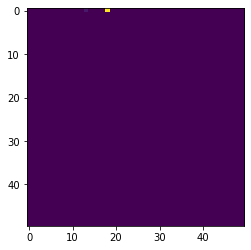

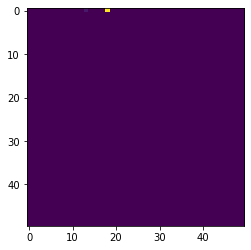

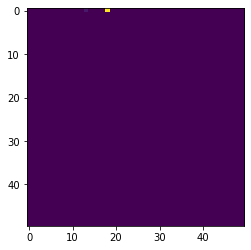

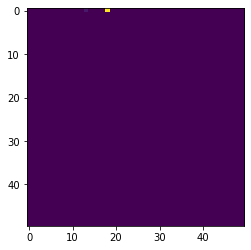

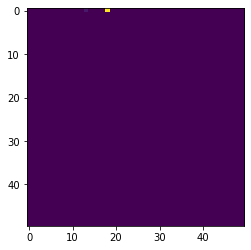

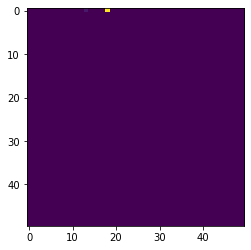

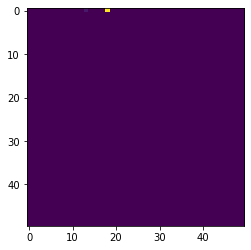

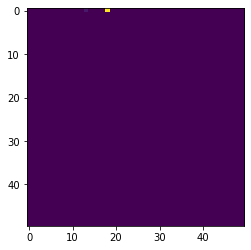

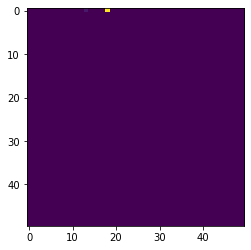

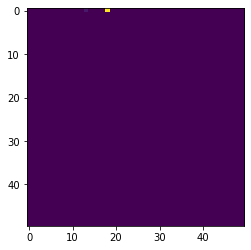

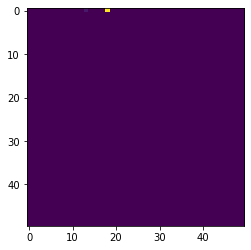

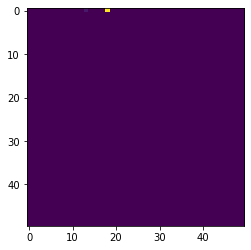

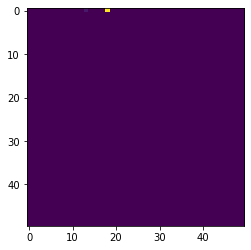

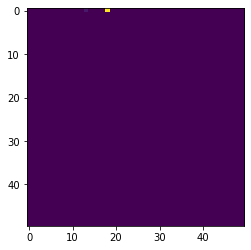

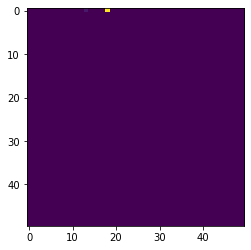

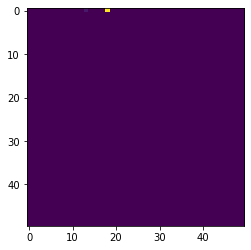

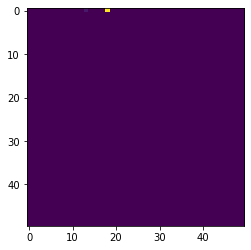

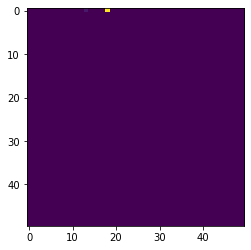

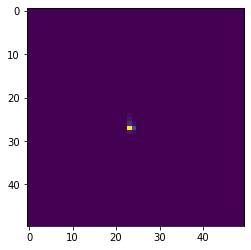

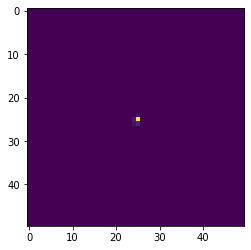

In [24]:
for i in range(nentries):
    plt.imshow(cluster[i,:,:])
    plt.show()

In [5]:
#Read out all other branches
data, col = tree_pi0.AsMatrix(columns=['ClusterType','E', 'Pt', 'ModuleNumber', 'X', 'Y'], return_labels=True)
#put all other branches in a dataframe
pi0_df = pd.DataFrame(data=data, columns=col)

#print out information about nentries and df head
print(f"Entries: {nentries}")
pi0_df.head()

Entries: 32


,ClusterType,E,Pt,ModuleNumber,X,Y
0,1.0,12.739141,12.245251,9.0,1.0,7.0
1,2.0,5.609921,5.194993,9.0,18.0,21.0
2,2.0,5.168575,4.748755,9.0,21.0,14.0
3,2.0,5.752418,5.277642,9.0,22.0,21.0
4,2.0,6.982239,6.694414,8.0,44.0,10.0
